In [1]:
#suur dataset, mdea kui hea kvaliteet, aga sitaks andmeid
!pip install kagglehub
import kagglehub

path = kagglehub.dataset_download("meruvulikith/190k-spam-ham-email-dataset-for-classification")

!mv {path} .

'mv' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!move {path} .

        1 dir(s) moved.


In [4]:
import numpy as np
import pandas as pd
import ast
import importlib
SpamData= pd.read_csv("1/spam_Emails_data.csv")

In [5]:
SpamData["label"]=SpamData["label"].apply(lambda x: 0 if x=="Ham" else 1)
SpamData["text"]=SpamData["text"].apply(lambda x:x if not isinstance(x, (int, float, complex)) and not isinstance(x, bool) else str(x)) 

In [6]:
SpamDataModel= SpamData.copy()
SpamDataModel2= SpamData.copy()
SpamDataAnalyse = SpamData.copy()

In [ ]:
## NEURAL





#####

In [24]:
#Uus
import Model
importlib.reload(Model)
Neural, nn_pred,nn_acc,nn_prec,nn_recall,nn_cm=Model.Neural_Model(SpamDataModel)


c:\Users\anold\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
4241/4241 ━━━━━━━━━━━━━━━━━━━━ 86s 20ms/step - accuracy: 0.9494 - loss: 0.1257 - val_accuracy: 0.9785 - val_loss: 0.0627
Epoch 2/5
4241/4241 ━━━━━━━━━━━━━━━━━━━━ 82s 19ms/step - accuracy: 0.9877 - loss: 0.0370 - val_accuracy: 0.9829 - val_loss: 0.0535
Epoch 3/5
4241/4241 ━━━━━━━━━━━━━━━━━━━━ 93s 22ms/step - accuracy: 0.9932 - loss: 0.0216 - val_accuracy: 0.9846 - val_loss: 0.0615
Epoch 4/5
4241/4241 ━━━━━━━━━━━━━━━━━━━━ 93s 22ms/step - accuracy: 0.9954 - loss: 0.0145 - val_accuracy: 0.9866 - val_loss: 0.0619
Epoch 5/5
4241/4241 ━━━━━━━━━━━━━━━━━━━━ 94s 22ms/step - accuracy: 0.9968 - loss: 0.0101 - val_accuracy: 0.9866 - val_loss: 0.0629
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9869 - loss: 0.0624
Test Loss: 0.06291492283344269
Test Accuracy: 0.9866049885749817
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Precision: 0.9853037706950624
Predictions: [[1]
 [0]
 [1]
 ...
 [0]
 [1]
 [0]]
Recall: 0.9862748676765833
Confusion Matrix:
[[30358   403]
 [  376 27019]]


In [26]:
importlib.reload(Model)
Model.SaveModel(Neural,"Neural")

In [ ]:
##










#  RandomForest

In [27]:
import Model
importlib.reload(Model)
modelRF,rf_pred,rf_acc,rf_prec,rf_recall,rf_cm=Model.RandomForestModel(SpamDataModel)

Accuracy: 98.39%
Precision: 0.99
Recall: 0.98
Confusion Matrix:
[[30370   391]
 [  545 26850]]


In [28]:
importlib.reload(Model)
Model.SaveModel(modelRF,"RandomForest")

In [ ]:
##############







#SVM

In [29]:
import Model
importlib.reload(Model)
SVModel,svm_pred,svm_acc,svm_prec,svm_recall,svm_cm=Model.SVM_Model(SpamDataModel)

Accuracy:   97.36%
Precision: 0.97
Recall: 0.98
Confusion Matrix:
[[29823   938]
 [  599 26796]]


In [30]:
importlib.reload(Model)
Model.SaveModel(SVModel,"SVM")

In [ ]:
###############









##############    3 model prediction

In [31]:
import Model
importlib.reload(Model)
final_pred,final_acc,final_prec,final_recall,final_cm=Model.MajorityVotingModel(SpamDataModel, modelRF, SVModel, Neural)

6058/6058 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
Accuracy: 99.48%
Precision: 0.99
Recall: 1.00
Confusion Matrix:
[[101533    627]
 [   382  91310]]


In [ ]:
#############33



#Plots



#############3

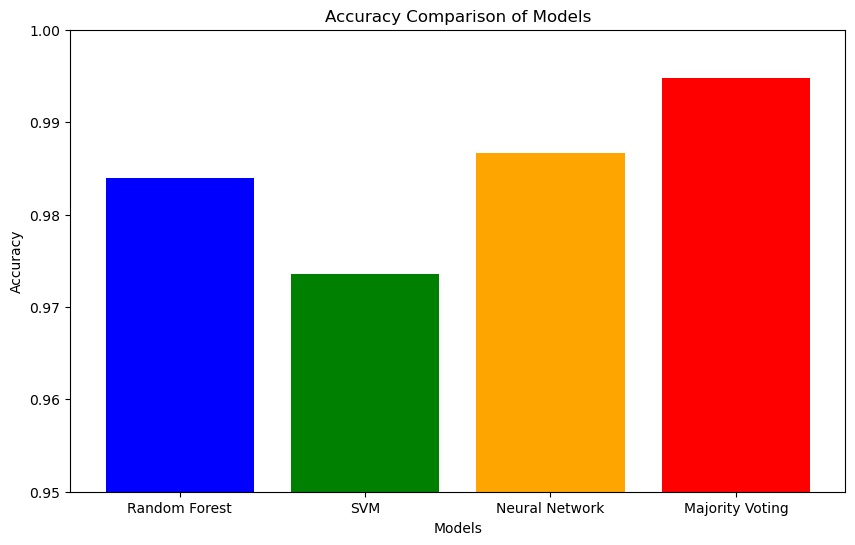

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


# Accuracy, will copy from output, i messed up with output and doing again will take too long
accuracies = [rf_acc,svm_acc,nn_acc,final_acc]
model_names = ['Random Forest', 'SVM', 'Neural Network', 'Majority Voting']

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')
plt.ylim(0.95, 1)
plt.show()

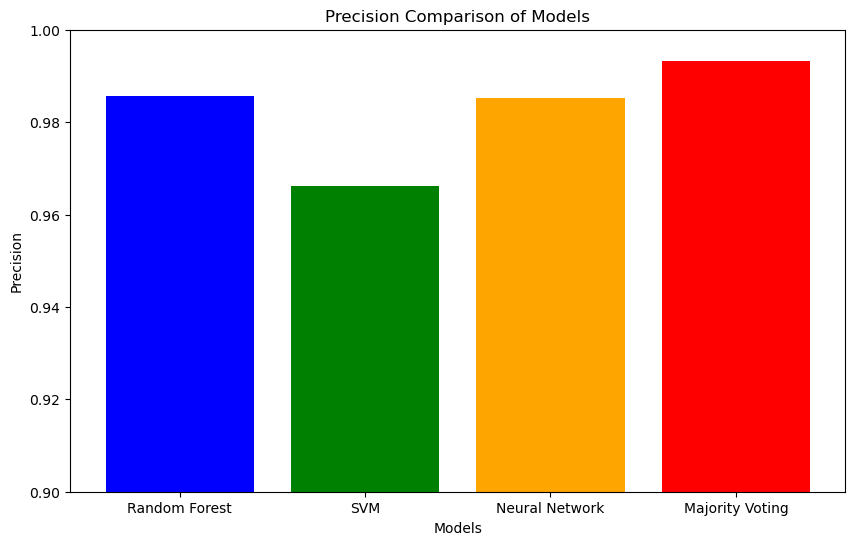

In [33]:
import matplotlib.pyplot as plt


model_names = ['Random Forest', 'SVM', 'Neural Network', 'Majority Voting']
precisions = [rf_prec,svm_prec,nn_prec,final_prec]

plt.figure(figsize=(10, 6))
plt.bar(model_names, precisions, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision Comparison of Models')
plt.ylim(0.9, 1)
plt.show()

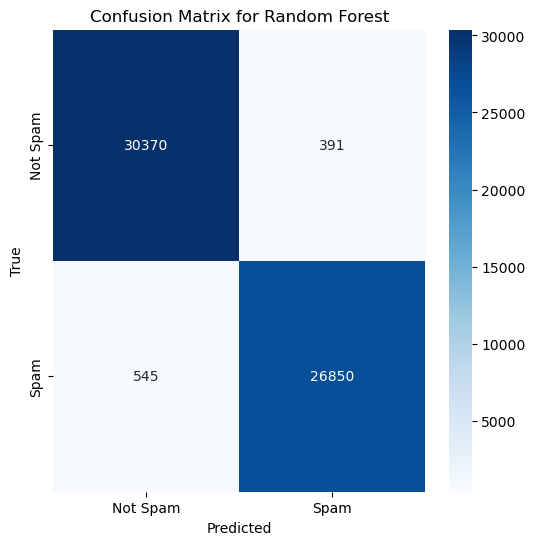

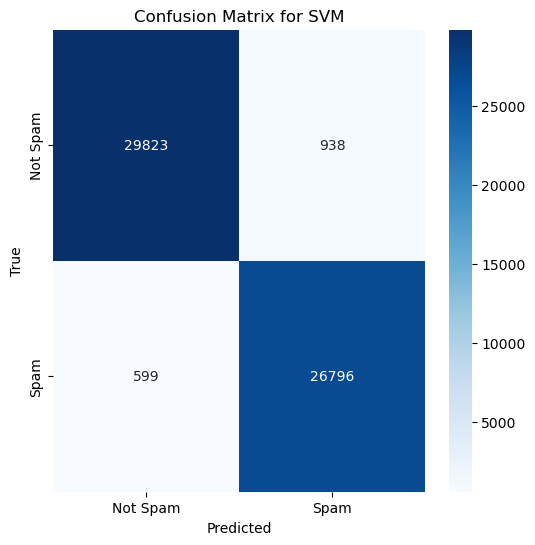

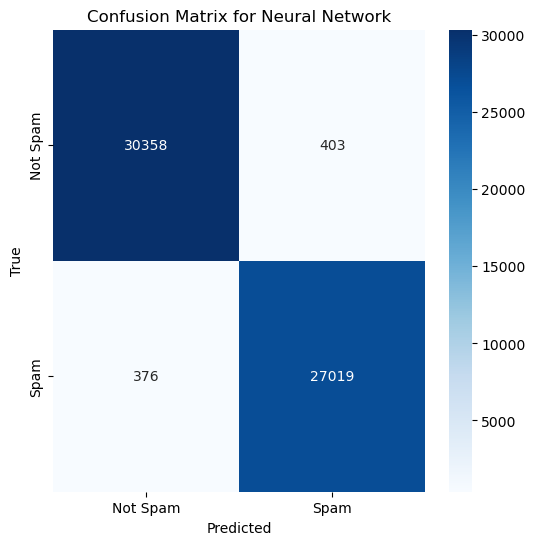

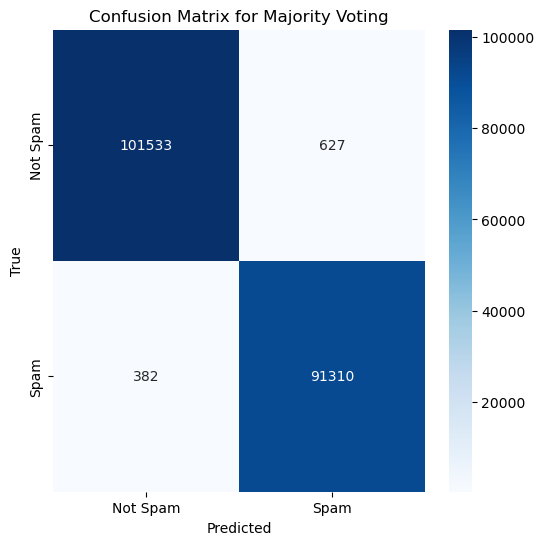

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Plotting function for confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(rf_cm, 'Random Forest')
plot_confusion_matrix(svm_cm, 'SVM')
plot_confusion_matrix(nn_cm, 'Neural Network')
plot_confusion_matrix(final_cm, 'Majority Voting')

In [ ]:
################





###########